In [1]:
%load_ext autoreload

In [2]:
import sys
sys.path.append("../utils")
import warnings
warnings.simplefilter('ignore')


from pinns import PhysicsInformedNN
from make_data import make_data
from send_line import send_line
from make_results import make_results


import numpy as np
import tensorflow as tf
import time


In [3]:
%autoreload

In [9]:
'''
mode_th : 各モード諸条件の上位何%を教師データ候補群とするのか
'''

pro = "asymmetric_squares"
path = "../../../data/{}/".format(pro)

layers = [3, 20, 20, 20, 20, 20, 20, 20, 20, 2]
Itration = 2*10**5
rs = 1234
train_rate = 0.75
N_train = .001 * train_rate

n_modes = 0
subject = "UU"
mode_th = .05


snap = [10]
debug = False
np.random.seed(rs)
tf.set_random_seed(rs)

In [10]:
X_star, x_train, y_train, t_train, u_train, v_train, TT, UU, VV, PP = make_data(path=path, N_train=N_train, n_modes=n_modes, subject=subject, mode_th=mode_th)

x_train :  (742, 1)
y_train :  (742, 1)
t_train :  (742, 1)
u_train :  (742, 1)
v_train :  (742, 1)


In [11]:
t1 = time.time()
model = PhysicsInformedNN(x_train, y_train, t_train, u_train, v_train, layers, debug)
model.train(Itration)
t2 = time.time()
elps = (t2 - t1) / 60.
print("elps:", elps)
send_line('解析終了')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

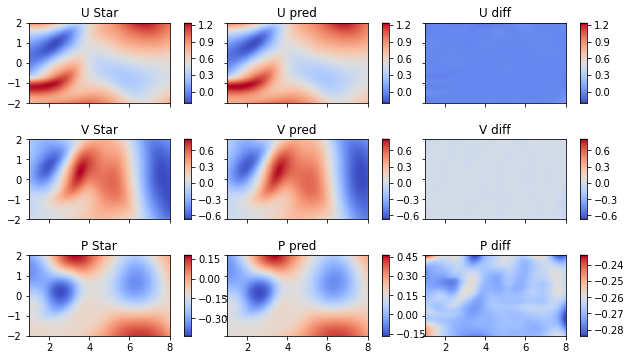

In [12]:
make_results(pro, subject, train_rate, model, X_star, TT, snap, UU, VV, PP, n_modes, mode_th, N_train, Itration, elps, rs)

In [19]:
model.loss_phys_log

AttributeError: 'PhysicsInformedNN' object has no attribute 'loss_phys_log'